In [12]:
#from: https://github.com/iShkiper/DSP_24.M20_21/blob/main/%D0%9A%D0%BE%D0%B4/1.1.0%20DFT_1D_on.ipynb

In [4]:
import numpy as np
import matplotlib.pyplot as plt

with open('source/CryptedFreq.npy', 'rb') as f:
    sigCoded = np.load(f)
    print(sigCoded.shape)

(1792,)


In [5]:
sigCoded

array([ 2.78628018,  5.68673354,  1.46482427, ..., -8.28399228,
       -0.37293784, -1.0429546 ])

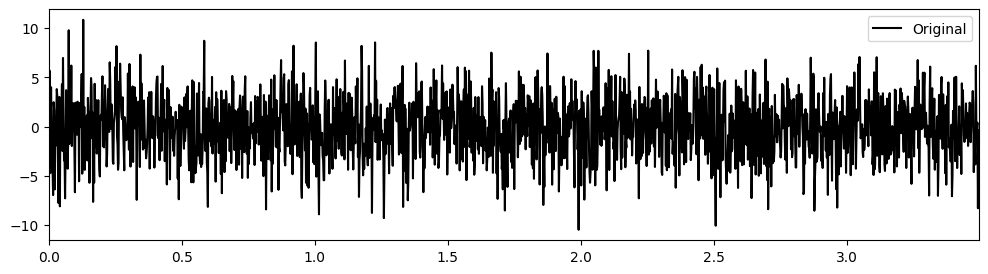

In [29]:
fs=512
T=1792/fs
N = np.int32(fs * T)
t = np.linspace(0,T,N,endpoint=False)
plt.figure(figsize=(12, 3))
plt.plot(t, sigCoded, color='k', label = 'Original')
plt.xlim(t[0],t[-1])
plt.legend()

In [13]:
def myDFT_AmplPlot(t, x, N=512, fs = None, xLim = 0.5):    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)
    
    if fs == None:
        fs = 1    
    freqs = fftshift(fftfreq(N, d = 1/fs))
    # Графики
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('Сигнал')
    plt.plot(t, x)
    plt.xlabel('Временные отсчёты')

    plt.subplot(1, 2, 2)
    plt.plot(freqs,xA)
    plt.xlabel('Частоты')
    plt.xlim([0, fs*xLim])
    plt.xticks(np.linspace(0, fs*xLim, 11))
    plt.grid()
    plt.tight_layout()


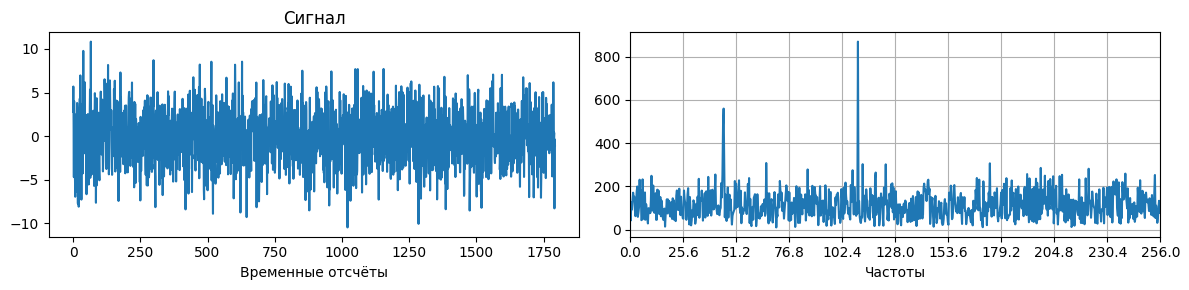

In [17]:
from scipy.fftpack import fft, ifft, fftshift, fftfreq

myDFT_AmplPlot(t,sigCoded, fs = 512)


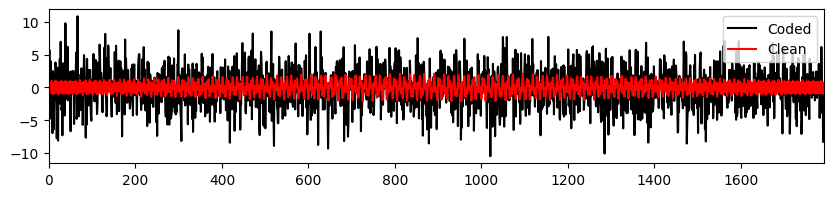

In [26]:
n=len(t)
sigF = fft(sigCoded,n)
sigFA = np.abs(sigF)
ind = sigFA > 400
sigF_clean = sigF * ind
sig_clean = np.real(ifft(sigF_clean))

plt.figure(figsize=(10, 2))
plt.subplot(2,1,1)
plt.plot(t, sigCoded, color='r', label = 'Noisy')
plt.xlim(t[0],t[-1])
#plt.ylim(np.min(sigCoded),np.max(sigCoded))
plt.legend()


plt.plot(t, sigCoded, color='k', label = 'Coded')
plt.plot(t, sig_clean, color='r', label = 'Clean')

plt.xlim(t[0],t[-1])
#plt.ylim(np.min(sigCoded),np.max(sigCoded))   
plt.legend()

In [35]:
from scipy.signal import find_peaks

fs = 512
n = len(sig_clean)
fft_vals = np.fft.rfft(sig_clean) # фурье
freqs = np.fft.rfftfreq(n, d=1/fs) # частоты
power = np.abs(fft_vals)**2 # мощьность спектра

# Поиск пиков в спектре
peaks, _ = find_peaks(power, height=np.mean(power)*5)  
detected_freqs = freqs[peaks]


print("Частоты синусоид:", detected_freqs)

Частоты синусоид: [ 45.14285714 110.        ]
